# Predict rain in Australia based on humidity on that day using DecisionTree Classifier

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
52005,2017-04-30,Tuggeranong,4.6,18.7,0.0,NaN,NaN,NNW,19.0,NaN,...,74.0,47.0,1023.3,1019.9,NaN,NaN,11.9,18.2,No,No
96933,2010-03-06,Adelaide,16.3,24.5,1.6,NaN,5.9,NW,43.0,N,...,59.0,37.0,1010.1,1007.2,NaN,NaN,17.5,22.8,Yes,Yes
105100,2016-03-21,Nuriootpa,10.1,23.5,0.0,4.5,11.2,SE,26.0,E,...,65.0,29.0,1020.2,1017.4,0.0,0.0,14.3,22.2,No,No
136931,2011-05-10,AliceSprings,4.7,21.1,0.0,4.0,10.6,ESE,37.0,NaN,...,59.0,27.0,1024.1,1020.4,1.0,1.0,12.7,20.5,No,No
36011,2016-01-25,SydneyAirport,21.1,25.0,0.0,4.6,0.0,NE,35.0,S,...,85.0,67.0,1014.5,1013.3,8.0,8.0,22.3,24.3,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52935,2011-05-23,MountGinini,3.6,4.2,23.6,NaN,NaN,WNW,67.0,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
69662,2015-06-26,Melbourne,NaN,NaN,NaN,1.6,5.7,WNW,26.0,WNW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51644,2016-05-04,Tuggeranong,12.0,17.4,0.0,NaN,NaN,WNW,39.0,NW,...,55.0,38.0,1015.4,1016.0,NaN,NaN,15.0,16.8,No,No
50153,2012-02-05,Tuggeranong,11.8,29.5,0.0,NaN,NaN,WNW,41.0,NaN,...,75.0,43.0,1002.9,998.3,NaN,NaN,18.0,27.5,No,No


In [7]:
test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
125987,2015-03-04,SalmonGums,8.3,26.0,0.0,NaN,NaN,SE,39.0,SE,...,56.0,40.0,NaN,NaN,NaN,NaN,20.5,24.5,No,No
100894,2012-10-12,MountGambier,7.0,12.7,2.2,2.2,2.4,W,41.0,SW,...,64.0,71.0,1025.0,1024.0,8.0,8.0,10.3,11.7,Yes,Yes
22722,2013-08-20,NorfolkIsland,11.0,19.6,0.0,5.0,7.5,W,39.0,NNE,...,56.0,59.0,1015.5,1011.5,5.0,7.0,16.7,18.4,No,Yes
25657,2013-05-08,Penrith,9.6,22.5,0.0,NaN,NaN,NNE,15.0,ENE,...,100.0,51.0,NaN,NaN,NaN,NaN,12.7,21.9,No,No
108543,2017-05-29,Woomera,7.5,18.9,0.0,1.6,NaN,SW,24.0,WSW,...,77.0,48.0,1025.2,1023.2,1.0,7.0,12.5,17.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127133,2009-10-29,Walpole,11.6,18.4,11.4,NaN,NaN,SW,35.0,WSW,...,75.0,64.0,1018.8,1018.8,NaN,NaN,14.7,17.1,Yes,No
128029,2012-05-15,Walpole,12.4,18.7,0.6,NaN,NaN,WSW,35.0,WNW,...,88.0,64.0,1019.8,1019.5,NaN,NaN,15.5,17.4,No,No
6807,2011-01-29,Cobar,21.2,36.2,0.0,NaN,NaN,E,41.0,E,...,50.0,23.0,1016.1,1014.1,NaN,NaN,24.3,34.4,No,No
108841,2009-08-28,Albany,9.5,12.0,20.4,4.6,1.7,NaN,NaN,WSW,...,94.0,67.0,1010.6,1012.3,8.0,6.0,10.2,11.8,Yes,Yes


In [8]:
train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,115176.000000,115357.000000,113731.000000,66145.000000,60551.000000,108231.000000,114972.000000,113970.000000,114204.000000,112751.000000,104352.000000,104389.000000,71574.000000,68714.000000,114920.000000,113477.000000
mean,12.199704,23.230352,2.367524,5.463504,7.614868,40.070322,14.060536,18.678582,68.840365,51.535445,1017.634348,1015.241810,4.448766,4.508455,17.000139,21.688616
std,6.400501,7.124286,8.503731,4.161074,3.781498,13.614840,8.922573,8.811145,19.015657,20.793976,7.102957,7.037815,2.885449,2.721966,6.487727,6.938506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [9]:
train["RainToday"].value_counts()

No     88177
Yes    25554
Name: RainToday, dtype: int64

## We will drop the RainToday from DataFrame as we will predict this

In [10]:
test.drop(["RainToday"], axis=1, inplace=True)

C:\Users\Syed Irfan\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
125987,2015-03-04,SalmonGums,8.3,26.0,0.0,NaN,NaN,SE,39.0,SE,...,17.0,56.0,40.0,NaN,NaN,NaN,NaN,20.5,24.5,No
100894,2012-10-12,MountGambier,7.0,12.7,2.2,2.2,2.4,W,41.0,SW,...,19.0,64.0,71.0,1025.0,1024.0,8.0,8.0,10.3,11.7,Yes
22722,2013-08-20,NorfolkIsland,11.0,19.6,0.0,5.0,7.5,W,39.0,NNE,...,20.0,56.0,59.0,1015.5,1011.5,5.0,7.0,16.7,18.4,Yes
25657,2013-05-08,Penrith,9.6,22.5,0.0,NaN,NaN,NNE,15.0,ENE,...,7.0,100.0,51.0,NaN,NaN,NaN,NaN,12.7,21.9,No
108543,2017-05-29,Woomera,7.5,18.9,0.0,1.6,NaN,SW,24.0,WSW,...,13.0,77.0,48.0,1025.2,1023.2,1.0,7.0,12.5,17.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127133,2009-10-29,Walpole,11.6,18.4,11.4,NaN,NaN,SW,35.0,WSW,...,20.0,75.0,64.0,1018.8,1018.8,NaN,NaN,14.7,17.1,No
128029,2012-05-15,Walpole,12.4,18.7,0.6,NaN,NaN,WSW,35.0,WNW,...,19.0,88.0,64.0,1019.8,1019.5,NaN,NaN,15.5,17.4,No
6807,2011-01-29,Cobar,21.2,36.2,0.0,NaN,NaN,E,41.0,E,...,6.0,50.0,23.0,1016.1,1014.1,NaN,NaN,24.3,34.4,No
108841,2009-08-28,Albany,9.5,12.0,20.4,4.6,1.7,NaN,NaN,WSW,...,26.0,94.0,67.0,1010.6,1012.3,8.0,6.0,10.2,11.8,Yes


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier()

In [14]:
train = train.dropna()

In [15]:
from matplotlib import pyplot as plt

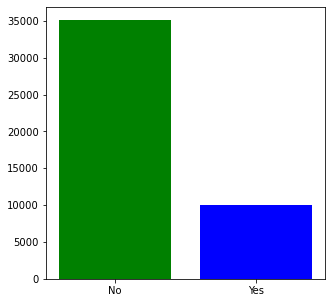

In [16]:
plt.figure(figsize=(5,5))
plt.bar(list(train['RainToday'].value_counts().keys()), list(train['RainToday'].value_counts()), color=['g','b'])
plt.show()

# Visualization of Rainfall when humidity increases

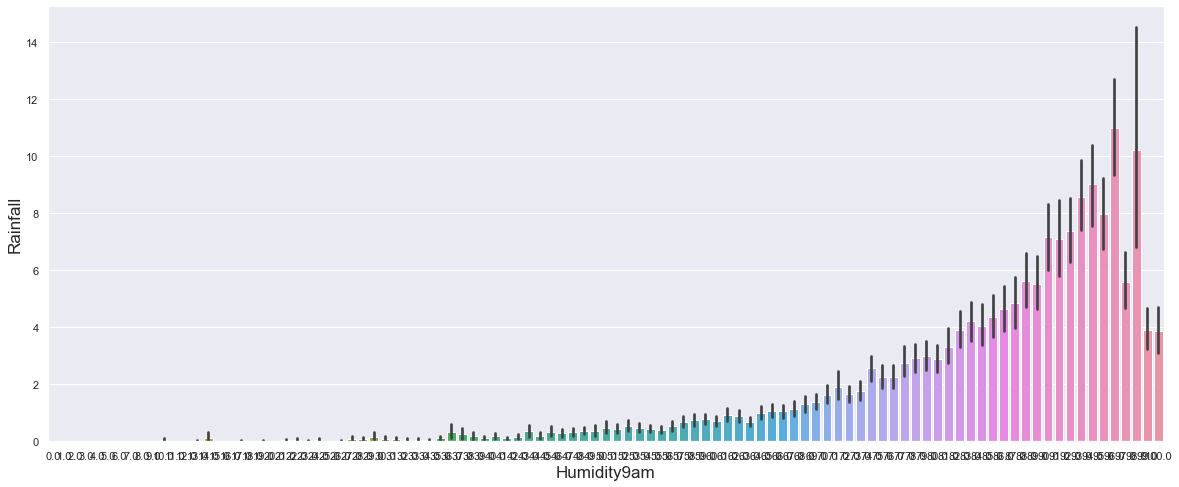

In [86]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
plt.xlabel("Humidity9am", fontsize= 17)
plt.ylabel("Rainfall", fontsize= 17)
sns.barplot(x='Humidity9am', y='Rainfall',  data=train)

In [17]:
x_train = train[['Humidity9am']]
y_train = train[['RainToday']]

In [18]:
train.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
105100,2016-03-21,Nuriootpa,10.1,23.5,0.0,4.5,11.2,SE,26.0,E,...,65.0,29.0,1020.2,1017.4,0.0,0.0,14.3,22.2,No,No
36011,2016-01-25,SydneyAirport,21.1,25.0,0.0,4.6,0.0,NE,35.0,S,...,85.0,67.0,1014.5,1013.3,8.0,8.0,22.3,24.3,No,Yes
70510,2009-04-28,Mildura,6.6,15.2,7.2,1.8,8.5,SSE,26.0,S,...,83.0,45.0,1023.3,1021.8,1.0,5.0,10.5,14.8,Yes,No
80974,2017-06-02,Watsonia,6.9,14.4,0.0,1.4,2.6,WSW,22.0,S,...,95.0,64.0,1037.3,1034.8,6.0,7.0,7.8,13.7,No,No
121958,2012-03-12,Perth,15.8,40.6,0.0,9.2,11.3,WSW,31.0,NE,...,28.0,28.0,1008.0,1005.1,2.0,2.0,30.1,33.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141127,2014-04-06,Darwin,25.1,32.7,6.6,4.8,10.1,ESE,65.0,ENE,...,71.0,59.0,1011.2,1008.1,4.0,4.0,29.7,32.1,Yes,Yes
95513,2015-04-11,Townsville,21.2,32.3,0.0,8.0,11.0,ENE,39.0,S,...,56.0,63.0,1014.6,1010.9,1.0,2.0,28.3,29.5,No,No
99617,2009-03-15,MountGambier,10.8,18.2,4.8,4.6,7.8,WSW,59.0,WNW,...,73.0,51.0,1012.8,1012.7,6.0,6.0,13.8,17.9,Yes,Yes
139458,2009-06-13,Darwin,18.2,30.5,0.0,5.0,10.6,N,28.0,S,...,54.0,31.0,1014.8,1011.7,1.0,1.0,23.2,29.5,No,No


In [20]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
test.isnull().sum()

Date                 0
Location             0
MinTemp            293
MaxTemp            250
Rainfall           624
Evaporation      12567
Sunshine         14018
WindGustDir       2136
WindGustSpeed     2126
WindDir9am        2212
WindDir3pm         920
WindSpeed9am       371
WindSpeed3pm       664
Humidity9am        490
Humidity3pm        890
Pressure9am       3049
Pressure3pm       3049
Cloud9am         11094
Cloud3pm         11704
Temp9am            319
Temp3pm            718
RainTomorrow       637
dtype: int64

In [22]:
test = test.dropna()

In [23]:
test.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

In [24]:
x_test = test[['Humidity9am']]

In [25]:
y_predict = dtc.predict(x_test)

In [26]:
y_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [27]:
result = pd.DataFrame({
    "Date" : test['Date'],
    "RainToday" : y_predict
}
)

In [28]:
result.to_csv('rain-prediction-australia.csv', index=False)

In [29]:
prediction = pd.read_csv("rain-prediction-australia.csv")

In [30]:
prediction.head(16)

,Date,RainToday
0,2012-10-12,No
1,2013-08-20,No
2,2015-03-31,No
3,2014-12-26,No
4,2016-04-03,No
5,2017-05-01,No
6,2014-07-18,No
7,2015-02-11,No
8,2009-05-20,Yes
9,2015-07-11,No
